In [23]:

%pip install seaborn
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.



In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [266]:
df = pd.read_csv('DataHome.csv')
df.head()


,Unnamed: 0,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09
1,1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09
2,2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09
3,3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4.000000e+09
4,4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2.950000e+09


In [249]:
df.isnull().sum()

Unnamed: 0              0
DiaChi                  0
Quan                    0
TinhTrangBDS            2
DienTich                0
Phongngu                0
TenPhanKhu          17154
SoTang              17490
PhongTam                0
Loai                    0
GiayTo               5733
MaCanHo             20738
TinhTrangNoiThat    11599
HuongCuaChinh       14852
HuongBanCong        15517
DacDiem             18588
Gia                     0
USD                     0
LogPrice                0
dtype: int64

In [268]:
df.dtypes

Unnamed: 0            int64
DiaChi               object
Quan                 object
TinhTrangBDS         object
DienTich            float64
Phongngu            float64
TenPhanKhu           object
SoTang              float64
PhongTam            float64
Loai                 object
GiayTo               object
MaCanHo              object
TinhTrangNoiThat     object
HuongCuaChinh        object
HuongBanCong         object
DacDiem              object
Gia                 float64
dtype: object

### Nhận xét Dữ liệu
- Bộ dữ liệu cung cấp thông tin cơ bản của các căn hộ ở Thành Phố Hồ Chí Minh
- Dữ liệu gồm 24019 dòng và 19 cột
- Kiểu dữ liệu số gồm: DienTich, Phongngu, SoTang, Gia, PhongTam. Còn lại là kiểu object
### Vấn đề
- Nhiều cột thiếu dữ liệu như: TenPhanKhu, SoTang,...
- Giá được định dạng bằng vnđ nên dữ liệu lớn
### Giải Quyết
- Lọc dữ liệu vẫn còn trong cột và phân tích tương quan với biến Giá
- Chuyển sang tiền vnđ --> USD chuyển chuẩn hóa theo hàm log


In [264]:
df1=  df

In [265]:

df1['USD'] = round(df1['Gia']/ 24000)
df1['LogPrice'] = np.log(df1['USD'])
HomePage = df1
df1.to_csv('Homepage.csv')

In [269]:
columns = ['SoTang', 'TinhTrangBDS', 'TenPhanKhu', 'GiayTo', 'MaCanHo', 'TinhTrangNoiThat', 'HuongCuaChinh', 'HuongBanCong', 'DacDiem']
filtered_data = {column: df1[df1[column].notnull()] for column in columns}
for i in columns:
    filtered_data[i] = filtered_data[i].reset_index()
    #filtered_data[i].to_csv(i+'.csv', index = False)

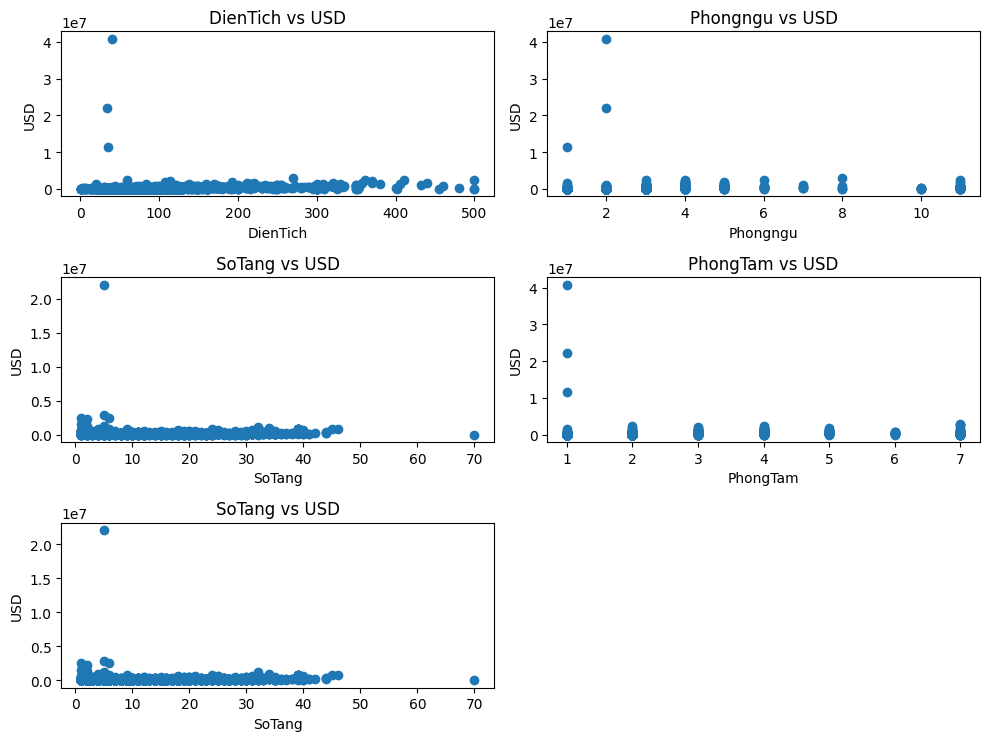

In [272]:
num_columns = ['DienTich', 'Phongngu', 'SoTang', 'PhongTam', 'Toilet']

def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(df1[x], df1['LogPrice'])
    plt.title(f'{x} vs LogPrice')
    plt.xlabel(x)
    plt.ylabel('LogPrice')

plt.figure(figsize=(10, 12))

for i, col in enumerate(num_columns):
    scatter(col, i + 1)

plt.tight_layout()

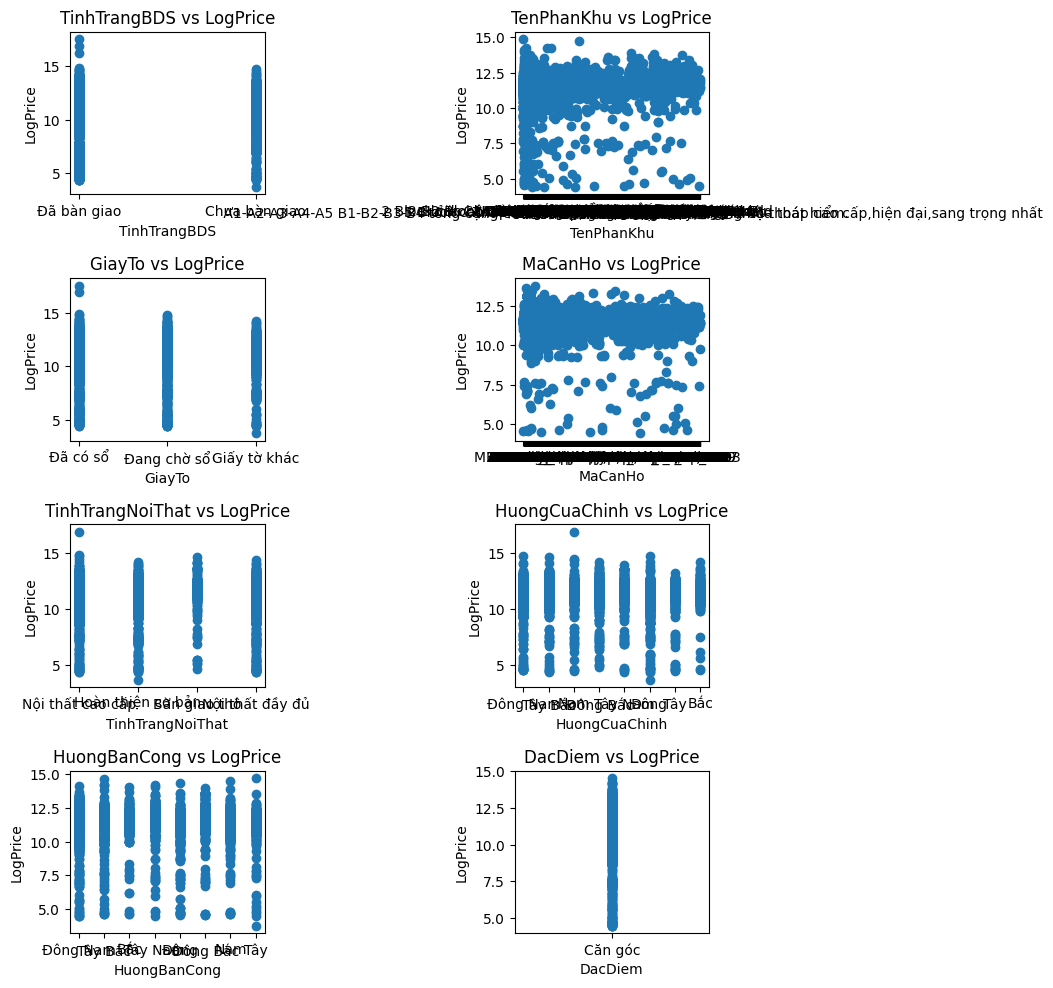

In [246]:

def scatter_2(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(filtered_data[x][x], filtered_data[x]['LogPrice'])
    plt.title(f'{x} vs LogPrice')
    plt.xlabel(x)
    plt.ylabel('LogPrice')

plt.figure(figsize=(10,12))

for i in range(1,len(columns)):
    scatter_2(columns[i], i)

plt.tight_layout()
#plt.show()